# Project 4

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def pause():
    ## pauses until a keyboard entry (e.g. carrage return)#     
    print('\r')     
    dummy = input('Pause')     
    print('\r')

## Part Ai
Loads in Hubble's Original velocity and distance values and plots them.

In [102]:
print("Part Ai: Loading in Hubble's original data and plotting it...")

data=np.genfromtxt('hubbleoriginal.csv',dtype=float,delimiter=',',skip_header=1).T
rhub=data[1,:]
vhub=data[2,:]

Part Ai: Loading in Hubble's original data and plotting it...


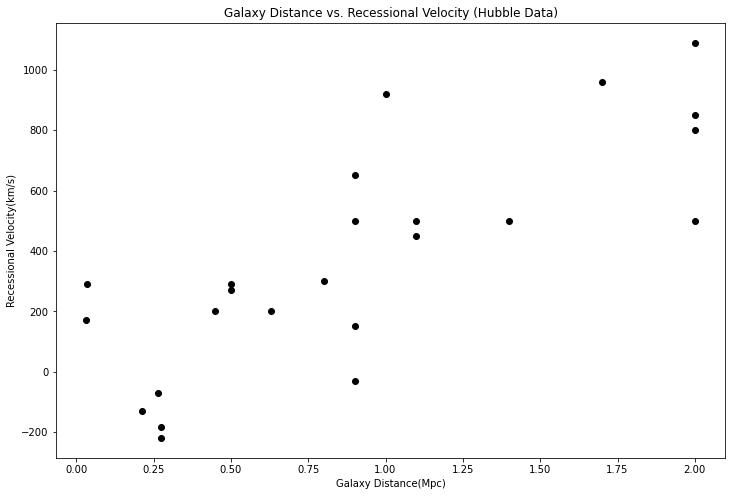

In [103]:
plt.figure(figsize=(12,8))
plt.scatter(rhub,vhub,color='black')
plt.title('Galaxy Distance vs. Recessional Velocity (Hubble Data)');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Recessional Velocity(km/s)')
plt.show()

In [104]:
pause()


Pause



## Part Aii
Plots a polyfit line to the original data.

In [105]:
print("Part Aii: Plotting a polyfit line to Hubble's data...")

m,b = np.polyfit(rhub,vhub,1)
line1 = (m*rhub) + b

Part Aii: Plotting a polyfit line to Hubble's data...


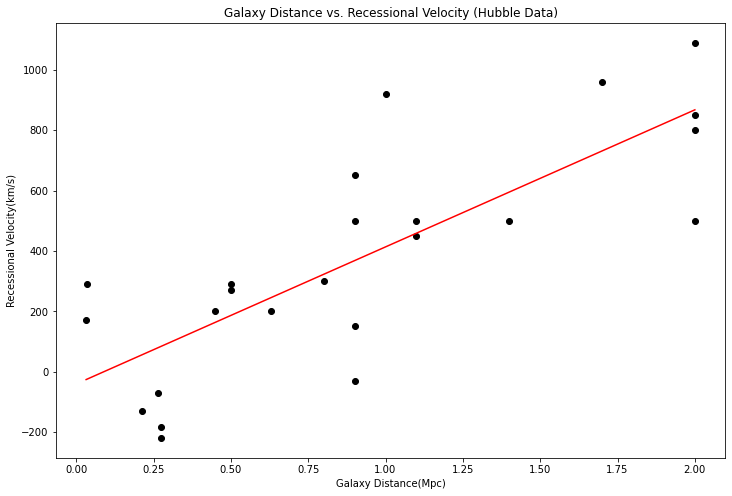

In [106]:
plt.figure(figsize=(12,8))
plt.scatter(rhub,vhub,color='black')
plt.plot(rhub,line1,color='red')
plt.title('Galaxy Distance vs. Recessional Velocity (Hubble Data)');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Recessional Velocity(km/s)')
plt.show()

In [107]:
pause()


Pause



## Part Aiii
Calculates the covariance of the polyfit line, uses it to find 68% confidence interval on the data.

In [108]:
print("Part Aiii: Plotting the 68% confidence lines to Hubble's data...")

mx, cov = np.polyfit(rhub,vhub,1,cov=True)
sigma_b = np.sqrt(cov[0,0])
sigma_m = np.sqrt(cov[1,1])
line2 = (mx[0]+sigma_m)*rhub + (mx[1]+sigma_b)
line3 = (mx[0]-sigma_m)*rhub + (mx[1]-sigma_b)

Part Aiii: Plotting the 68% confidence lines to Hubble's data...


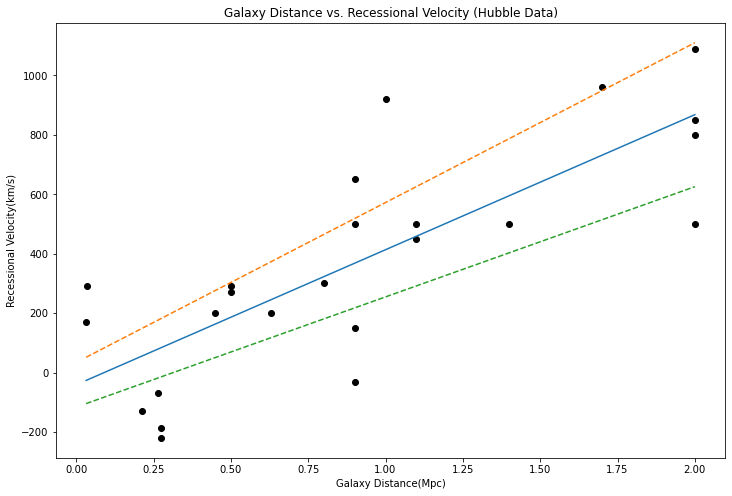

In [109]:
plt.figure(figsize=(12,8))
plt.scatter(rhub,vhub,color='black')
plt.plot(rhub,line1)
plt.title('Galaxy Distance vs. Recessional Velocity (Hubble Data)');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Recessional Velocity(km/s)')

plt.plot(rhub,line2,ls='--')
plt.plot(rhub,line3,ls='--')

plt.show()

In [110]:
pause()


Pause



## Part Aiv
Finds the Pearson r coefficient and its p-value for the Hubble original data.

In [111]:
print("Part Aiv: Outputting the Pearson coefficient and it's p-value...")

x=rhub;y=vhub
r,p = stats.pearsonr(x,y)
print(r,p)

Part Aiv: Outputting the Pearson coefficient and it's p-value...
0.7896394879353184 4.477491000609156e-06


In [112]:
pause()


Pause



## Part Bi
Loads in ned1 and ned4 distances and velocities, then plots them with the Hubble data.

In [113]:
print("Part Bi: Loading in ned1 and ned4 data and plotting it...")

ned1_data=np.genfromtxt('ned1dlevel5.csv',dtype=float,delimiter=',',skip_header=2).T
rhub_ned1=ned1_data[3,:]
vhub_ned1=ned1_data[11,:]

ned4_data=np.genfromtxt('ned4dlevel5.csv',dtype=float,delimiter=',',skip_header=2).T
rhub_ned4=ned4_data[3,:]
vhub_ned4=ned4_data[10,:]

Part Bi: Loading in ned1 and ned4 data and plotting it...


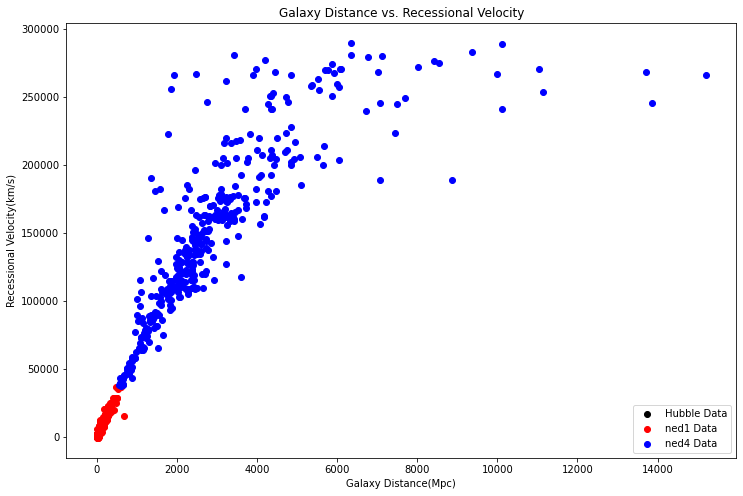

In [114]:
plt.figure(figsize=(12,8))

plt.scatter(rhub,vhub,color='black',label='Hubble Data')
plt.scatter(rhub_ned1,vhub_ned1,color='red',label='ned1 Data')
plt.scatter(rhub_ned4,vhub_ned4,color='blue',label='ned4 Data')

plt.title('Galaxy Distance vs. Recessional Velocity');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Recessional Velocity(km/s)')
plt.legend(loc='lower right')
plt.show()

In [115]:
pause()


Pause



## Part Bii
Converts all three data set velocities to effective velocity and then plots the new velocities together.

In [116]:
print("Part Bii: Converting all three data set velocities to effective velocity and plotting it...")

# takes in the original velocity arrays and converts them to the effective velocity
def eff_velocity(data):
    c = 299792 #speed of light in km/s
    bot = np.sqrt(1-(data/c))
    top = np.sqrt(1+(data/c))
    doppler = (top/bot)-1
    effv = doppler*c
    return effv #returns effective velocity

Part Bii: Converting all three data set velocities to effective velocity and plotting it...


In [117]:
hub_effv = eff_velocity(vhub)
ned1_effv = eff_velocity(vhub_ned1)
ned4_effv = eff_velocity(vhub_ned4)

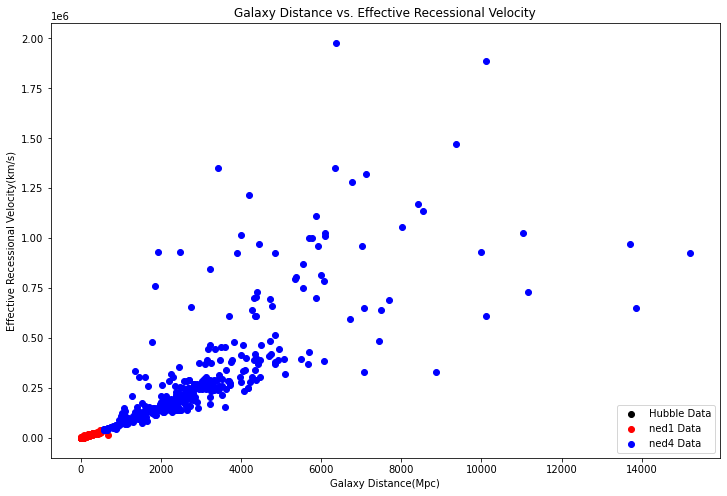

In [118]:
plt.figure(figsize=(12,8))

plt.scatter(rhub,hub_effv,color='black',label='Hubble Data')
plt.scatter(rhub_ned1,ned1_effv,color='red',label='ned1 Data')
plt.scatter(rhub_ned4,ned4_effv,color='blue',label='ned4 Data')

plt.title('Galaxy Distance vs. Effective Recessional Velocity');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Effective Recessional Velocity(km/s)')
plt.legend(loc='lower right')
plt.show()

In [119]:
pause()


Pause



## Part Biii
Finds polyfit lines for each data set (and their new velocities), then plots them together.

In [120]:
print("Part Biii: Plotting a polyfit line to each data set...")

m,b = np.polyfit(rhub,hub_effv,1)
hub_line = (m*rhub) + b

m,b = np.polyfit(rhub_ned1,ned1_effv,1)
ned1_line = (m*rhub_ned1) + b

m,b = np.polyfit(rhub_ned4,ned4_effv,1)
ned4_line = (m*rhub_ned4) + b

Part Biii: Plotting a polyfit line to each data set...


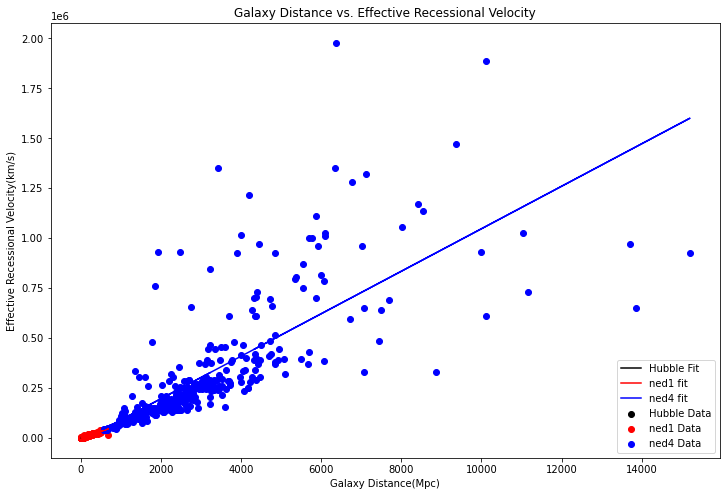

In [121]:
plt.figure(figsize=(12,8))

plt.scatter(rhub,hub_effv,color='black',label='Hubble Data')
plt.scatter(rhub_ned1,ned1_effv,color='red',label='ned1 Data')
plt.scatter(rhub_ned4,ned4_effv,color='blue',label='ned4 Data')

plt.plot(rhub,hub_line,label='Hubble Fit',color='black')
plt.plot(rhub_ned1,ned1_line,label='ned1 fit',color='red')
plt.plot(rhub_ned4,ned4_line,label='ned4 fit',color='blue')

plt.title('Galaxy Distance vs. Effective Recessional Velocity');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Effective Recessional Velocity(km/s)')
plt.legend(loc='lower right')
plt.show()

In [122]:
pause()


Pause



## Part Biv
Finds the Pearson r coefficient and its p-value for all of the data sets.

In [123]:
print("Part Biv: Outputting the Pearson coefficient and p-value for each data set...")

x=rhub;y=hub_effv
r,p = stats.pearsonr(x,y)
print('Hubble Data:',r,p)

Part Biv: Outputting the Pearson coefficient and p-value for each data set...
Hubble Data: 0.7896940579883601 4.465957185324601e-06


In [124]:
x=rhub_ned1;y=ned1_effv
r,p = stats.pearsonr(x,y)
print('ned1 Data:',r,p)

ned1 Data: 0.9700672755388435 0.0


In [125]:
x=rhub_ned4;y=ned4_effv
r,p = stats.pearsonr(x,y)
print('ned4 Data:',r,p)

ned4 Data: 0.7504391719268876 3.9176872807242573e-72


In [126]:
pause()


Pause



## Part Ci
Loads in the original Hubble RA and Dec data.

In [127]:
print("Part Ci: Loading in the Hubble RA and Dec values...")

# takes in the header value arrays from the hubble data, returns a linear fit for the data and a correction to the velocity values
def fit_correction(x,y,r,d):
    # Generating the X matrix for the correction model above    
    X = np.vstack(( x,np.cos(r)*np.cos(d),np.sin(r)*np.cos(d),np.sin(d)))    
    # Fitting and reporting the coefficients of the fit    
    A = np.dot( np.linalg.inv(np.dot(X,X.T)), np.dot(y,X.T) )    
    print("Ho: {}, X: {}, Y: {}, Z: {}".format(*tuple(A)))    
    # Finding the fit and correction    
    fit = x * A[0]    
    correction = np.dot(A[1:],X[1:])    
    # Finding and reporting the chi square and p values    
    x2 = ( (y-fit)**2 / np.var(y-fit) ).sum()    
    p = 1 - stats.chi2.cdf(x2, x.size - 2)    
    print("X2: {}, p-val: {}".format(x2,p))    
    return fit, correction

Part Ci: Loading in the Hubble RA and Dec values...


In [128]:
hub_ra = data[3,:] #in hours
hub_dec = data[4,:] #in degrees

In [129]:
pause()


Pause



## Part Cii
Converts the Hubble RA and Dec values to radians.

In [130]:
print("Part Cii: Converting the Hubble RA and Dec values to radians...")

hrs_to_degrees = 15
degrees_to_rads = np.pi/180

hub_ra = hub_ra*hrs_to_degrees*degrees_to_rads
hub_dec = hub_dec*degrees_to_rads

Part Cii: Converting the Hubble RA and Dec values to radians...


In [131]:
pause()


Pause



## Part Ciii
Finds the linear fit (and its coefficients) and the velocity correction for the new Hubble data.

In [132]:
print("Part Ciii: Finding the coefficients of the linear fit of the Hubble data...")

new_fit,new_effv = fit_correction(rhub,hub_effv,hub_ra,hub_dec)
final_effv = hub_effv-new_effv

Part Ciii: Finding the coefficients of the linear fit of the Hubble data...
Ho: 465.91421053359807, X: -68.7789608866633, Y: 236.47980420933067, Z: -200.2764140647073
X2: 25.253080779447266, p-val: 0.2851258401581186


In [133]:
pause()


Pause



## Part Civ
Plots the linear fit line and the data correction for Hubble's.

Part Civ: Plotting the linear fit of the Hubble data and its correction...


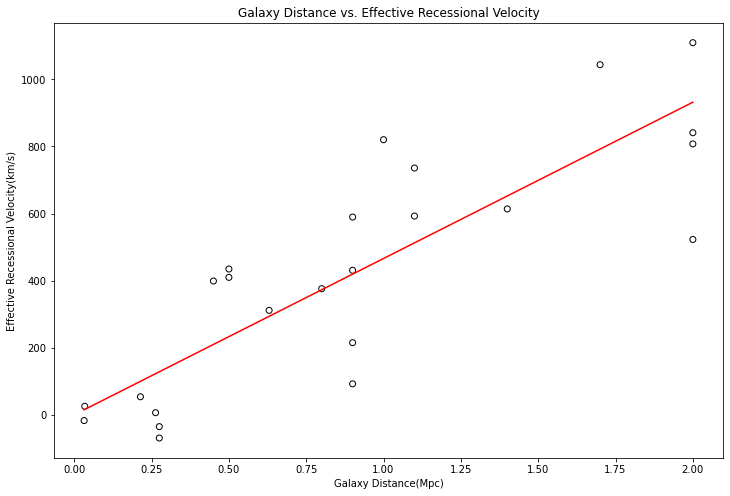

In [134]:
print("Part Civ: Plotting the linear fit of the Hubble data and its correction...")

plt.figure(figsize=(12,8))

plt.scatter(rhub,final_effv,facecolors='none', edgecolors='black')
plt.plot(rhub,new_fit,label='Hubble Fit',color='red')
plt.title('Galaxy Distance vs. Effective Recessional Velocity');plt.xlabel('Galaxy Distance(Mpc)');plt.ylabel('Effective Recessional Velocity(km/s)')
plt.show()